<a id='inizio'></a>
# Modeling

In this notebook we'll present you the mainly machine learning algorithms, introducing *why & when* use them with some examples.
<br><br>
This notebook will present the following topics:
- **Regression**:
    - [Linear Regression](#linear_regression)<a href='#linear_regression'></a><br>
- **Supervised Algos**:
    - [K-Nearest Neighbors Classification](#k_near)<a href='#k_near'></a><br>
    - [SVM - Support Vector Machine](#svm)<a href='#svm'></a>
    - [Decision Trees](#decision_tree)<a href='#decision_tree'></a>
- **Ensemble Learning**:
    - [Bagging](#bagging)<a href='#bagging'></a>
    - [Random Forest](#random_forest)<a href='#random_foreset'></a>
    - [Feature Importance](#feature_importance)<a href='#feature_importance'></a>
    - [Boosting](#boosting)<a href='#boosting'></a>
    - [Stacking](#stacking)<a href='#stacking'></a>
- **Unsupervised Algos**:
    - PCA and Isomap (saw in Transforming notebook);
    - [K-Means](#k_means)<a href='#k_means'></a>.<br>
    - [Hierarchical Clustering](#hierarchical_clustering)<a href='#hierarchical_clustering'></a>.<br>
    - [DBSCAN](#dbscan)<a href='#dbscan'></a>.<br>


---------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

<a id='linear_regression'></a>
# Linear Regression

The main difference between classification and regression algorithms is that regression aims to compute a continuous output, but the goal of classification is to predict a discrete, categorical output. Using classification, samples get labeled depending on a decision boundary test that separates our data into a range of space. **With regression, a continuous value output is calculated from a best fit curve function that runs through our data**. <br>

In the special case of linear regression, the curve is restricted such that it is linear. <br>
*Effectively predicting the future*, known as **extrapolating**, or *identifying a trend in our existing data*, known as **interpolating**, requires there be a statistically significant, linear correlation between our features. Without a decent correlation, linear regression isn't able to benefit to us.
<br>
You may also have heard the phrase, [correlation doesn't imply causation](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation). This is an easy trap to fall into when using regression. You can build a linear regression model that fits a relationship between university student's GPA and their first job's
annual salary. But simply having a high GPA in doesn't cause someone to have a high paying job, although there is probably some significance between the two.
<br>

##### How does Linear Regression work?
Everything that regular linear regression does can be explained with this single figure:
<img src="resources/linear_regression.jpg">
**y = mx + b** <br>
This is the basic equation of linear regression and is the formula for the green line above, however we're going to alter the variable naming convention slightly, just so that it matches the SciKit-Learn documentation: *y = w0 + w1x*. <br>
All that we've done so far is change m to w1 , and b to w0 . The w's stand for 'weights coefficients', our currently unknown parameters for calculating y given x. <br>
From the diagram it's clear that w0 actually corresponds to the y-intercept or offset between the green line and the x-axis. As for w1, that is the quotient of the change of your dependent variable y and the change of your independent variable x. <br>

That's pretty much it! Linear regression is all about computing a scalar feature as a linear combination of weights multiplied by dependent features. <br>
SciKit-Learn uses a technique called ordinary least squares to compute the weights coefficients and intercept needed to solve for the best fitting line that goes through your samples. In the figure above, each of the black dots represents one of your features and of course the green line is your least squares, best fitting line. 

The red lines represent distances between the true, observed values of your sample compared to the least squares line we're hoping to calculate. Stated differently, these distances are the error between the approximate solution and the actual value. <br>

Ordinary least squares works by minimizing the *squared sum* of all these red line errors to compute the best fitting line. <br>

Once you have the equation, you can use it to calculate an expected value for feature y, given that you have feature x. If the x values you plug into the equation happen to lie within the x-domain boundary of those samples you trained your regression with, then this is called interpolation or even approximation, because you do have the actual observed values of y for the data in that range. When you use the function to calculate a y-value outside the bounds of your training data's x-domain boundary, that is called extrapolation.
<br>

##### When to use Linear Regression?
Linear regression is widely used in all disciplines for forecasting upcoming feature values by extrapolating the regression line, and for estimating current feature values by interpolating the regression curve over existing data. <br>
It is an extremely wellunderstood and interpretable technique that run very fast, and produces reasonable results as long as you do not extrapolate too far away from your training data.
One of the main advantages of linear regression over other machine learning
algorithms is that even though it's a supervised learning technique, it doesn't force you to fine tune a bunch of parameters to get it working. You can literally just dump your data into it and let it produce its results.<br>
You can use linear regression if your features display a significant correlation. The stronger the feature correlation, it being closer to +1 or -1, the better and more accurate the linear regression model for your data will be. <br>
The questions linear regression helps you answer are which independent feature inputs relate to the dependent feature output variable, and the degree of that relationship.<br>
Try to understand better the [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) with an example:


In [3]:
from mpl_toolkits.mplot3d import Axes3D

matplotlib.style.use('ggplot') # Look Pretty

We'll load a college's dataset. <br>
The first thing we should notice is that the first column is both unique (the name of each) college, as well as unlabeled. This is a HINT that it must be the index column. If we do not indicate to Pandas that we already have an index column, it'll create one for us, which would be undesirable since we already have one.

In [4]:
x = pd.read_csv('resources/College_dwn.csv', index_col = 0)
x.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
x.dtypes

Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [6]:
# We map 'Private' column as boolean 1-Yes & 0-No
x.Private = x.Private.map({'Yes':1, 'No':0})
x.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Create your linear regression model here and store it in a variable called model. Don't actually train or do anything else with it yet:

In [7]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

def model_fit(x_train, y_train):
    
    model = linear_model.LinearRegression().fit(x_train, y_train)

    LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    
    return model

SciKit-Learn's LinearRegression class implements all the expected methods found in the rest of their supervised learning classes, including: fit(), predict(), fit_predict(), and score(). <br>
As for its outputs, the attributes you're interested in are:
- **Intercept**: the scalar constant offset value; <br>
- **Coef**: an array of weights, one per input feature, which will act as a scaling factor. <br><br>


From here on out, you should separate your data into a training and testing set before fitting your predictor models, as reflected in the code above. X_train is either a single dimensional array, shaped like [n_samples], where each sample corresponds to the single feature you're fitting. Or alternatively, you can run multiple linear regression models simultaneously on the same dataset by passing in a [n_samples, n_features] array. <br>

Your y_train target can also be a single dimensional [n_samples] list of expected values, or it can be an [n_samples, n_targets] array if you are using linear regression to compute more than one feature simultaneously. When doing that, your **.intercept_** will also be an array, one value per target. <br>

The LinearRegression class comes with a convenience **.score()** method that returns the **R-squared coefficient**, and the calculation for that is included with the SciKit-Learn API documentation. **This coefficient
communicates how much your change in output is explained by your change in input values.** <br>

*R-squared is beneficial because unlike the sum of squared distances, it is normalized so that the number of observations sampled does not affect it.* The larger the R score, the better of a fit the model is for your data, 1.0 being the maximum value achievable for a perfect match. <br><br>

*One thing to keep in mind is that your R coefficient increases the more features you consider when modeling your linear regression, even if those features don't have a good correlation with your dependent feature's values.* Due to this, be selective about which features you choose to use and select just the subset of the most promising ones, otherwise you might be subject to errant overfitting. <br>

Finally, **linear regression works with continuous data, as well as categorical data once numerically encoded.** <br>

If you do end up using categorical data and have multiple dummy boolean columns you want to calculate, for example IceCream_Vanilla, IceCream_Chocolate, and IceCream_CookiesNCream, then you should calculate all three of these target regression lines simultaneously. Just increase the number of targets, or your training labels dimension, and then each regression calculation will have its own offset stored in your .intercepts_ array attribute, and the .coeff_ attribute will become an array of arrays, one per target. <br>

In SciKit-Learn, this is called *Multi-Output Linear Regression*.

The first relationship we're interested in is the number of accepted students, as a function of the amount charged for room and board.

Using indexing, create two slices (series). One will just store the room and board column, the other will store the accepted students column. Then use train_test_split to cut your data up into `X_train`, `X_test`, `y_train`, `y_test`, with a `test_size` of 30% and a random_state of 7.

In [8]:
y_f = x.loc[:, 'Accept']
y_f = pd.DataFrame(y_f)
x_f = x.loc[:, 'Room.Board']
x_f = pd.DataFrame(x_f)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_f, y_f, test_size= 0.3, random_state = 7)

Fit and score your model appropriately. Store the score in the `score` variable.

In [10]:
model = model_fit(x_train, y_train)
score = model.score(x_train, y_train)

/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [11]:
# Defining an useful function to plot 
# linear regression function and actual value
def drawLine(model, X_test, y_test, title, R2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print(title)
    print("Intercept(s): ", model.intercept_)


Accept(Room&Board) R2: 0.0053273912215762165
Intercept(s):  [1340.61956519]


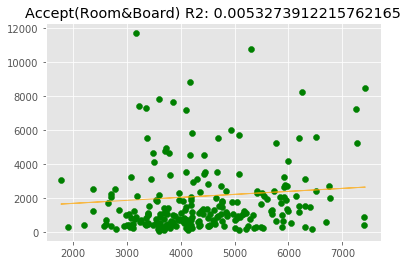

In [12]:
drawLine(model, x_test, y_test, "Accept(Room&Board)", score)

Duplicate the process above; this time, model the number of accepted students, as a function of the number of enrolled students per college.

In [13]:
y_f = x.loc[:, 'Accept']
y_f = pd.DataFrame(y_f)
x_f = x.loc[:, 'Enroll']
x_f = pd.DataFrame(x_f)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_f, y_f, test_size= 0.3, random_state = 7)
model = model_fit(x_train, y_train)
score = model.score(x_train, y_train)

Accept(Enroll) R2: 0.823639029490361
Intercept(s):  [151.72611242]


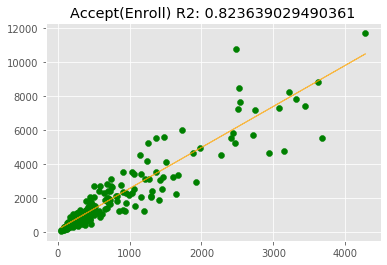

In [15]:
drawLine(model, x_test, y_test, "Accept(Enroll)", score)

Duplicate the process above (almost). This time is going to be a bit more complicated. Instead of modeling one feature as a function of another, you will attempt to do multivariate linear regression to model one feature as a function of TWO other features.

Model the number of accepted students as a function of the amount charged for room and board _and_ the number of enrolled students. To do this, instead of creating a regular slice for a single-feature input, simply create a slice that contains both columns you wish to use as inputs. Your training labels will remain a single slice.

In [16]:
y_f = x.loc[:, 'Accept']
y_f = pd.DataFrame(y_f)
x_f = x.loc[:, ['Room.Board', 'Enroll']]
x_f = pd.DataFrame(x_f)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_f, y_f, test_size= 0.3, random_state = 7)
model = model_fit(x_train, y_train)
score = model.score(x_train, y_train)

In [18]:
# Function to drawing an HyperPlane

def drawPlane(model, X_test, y_test, title, R2):
    # This convenience method will take care of plotting your
    # test observations, comparing them to the regression plane,
    # and displaying the R2 coefficient
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_zlabel('prediction')

    
    # You might have passed in a DataFrame, a Series (slice),
    # an NDArray, or a Python List... so let's keep it simple:
    X_test = np.array(X_test)
    col1 = X_test[:,0]
    col2 = X_test[:,1]

    
    # Set up a Grid. We could have predicted on the actual
    # col1, col2 values directly; but that would have generated
    # a mesh with WAY too fine a grid, which would have detracted
    # from the visualization
    x_min, x_max = col1.min(), col1.max()
    y_min, y_max = col2.min(), col2.max()
    x = np.arange(x_min, x_max, (x_max-x_min) / 10)
    y = np.arange(y_min, y_max, (y_max-y_min) / 10)
    x, y = np.meshgrid(x, y)

    
    # Predict based on possible input values that span the domain
    # of the x and y inputs:
    z = model.predict(  np.c_[x.ravel(), y.ravel()]  )
    z = z.reshape(x.shape)

    
    ax.scatter(col1, col2, y_test, c='g', marker='o')
    ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print(title)
    print("Intercept(s): ", model.intercept_)


Accept(Room&Board,Enroll) R2: 0.8392416510190857
Intercept(s):  [-1176.62848249]


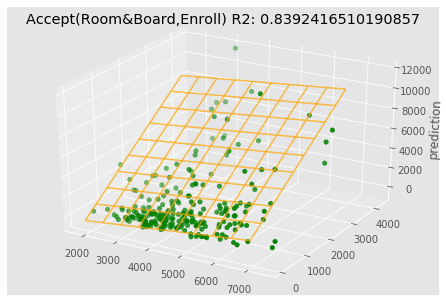

In [19]:
drawPlane(model, x_test, y_test, "Accept(Room&Board,Enroll)", score)

Linear regression is a very powerful technique if used correctly. *With just a few instances of well correlated samples, linear regression can capture the underlying pattern in your dataset, making its use of your data very efficient.* <br>
This applies even more so to smaller datasets. <br>
- **Linear regression only works with linear data, by identifying linear relationships between your continuous output and your independent input features**. Sometimes there simply isn't a linear correlation, and in these cases the regression completely fails. Luckily, it's pretty easy to detect this by looking at the resulting R coe􀃕cient, or by visually plotting your data. <br>
- The further you extrapolate from the range of your training data, the less reliable the results of the regression become.

Usefull links:
- [Linear Regression vs PCA](https://shankarmsy.github.io/posts/pca-vs-lr.html)

[Click here to return to the top of the pag](#inizio)<a href='#inizio'></a>

---------------------

# Supervised Algorithms


The main difference between supervised and unsupervised learning is that **with supervised learning, we actually guide the machine's hand at choosing the right answers.** <br>
*By showing the computer examples of what you want it to do, instead of just asking it to tell you something interesting about your data, the computer's responsibility shifts to deriving a set of rules that when applied to raw data, has a decent chance of choosing the answers you've trained it to.* <br>
<br>
The supervised learning estimators implement a slightly different set of distinct methods: <br>
- **.predict()**: After training our machine learning model, we can predict the label of new and never seen samples;
- **.predict_proba()**: For some estimators, we can further see what the probability of the new sample belonging to each label is;
- **.score()**: The ability to score how well our model fit the training data.
<br><br>
<br>
While training our machine with supervised learning, it's important to track how well its performing. <br>
Our goal with machine learning is to create a generalizable algorithm that can be applied to data it hasn't seen yet and still do the task we've trained it to do. <br>
To make this possible, of course we'll still need to fit our estimator; but when it comes to testing it, that part will have to be done with data the estimator has never seen before. <br>
In other words, all of our training transformation and modeling needs to done using just our **training data**, without ever seeing our **testing data**.<br>
This will be our way of validating the true accuracy of your model. This is doable by splitting our training data into two portions: <br> 
- One part will actually be used for the training as usual; <br>
- The other part of the data is retained and used during testing only. <br> 
<br><br>
*How much data should we hold back?* <br>
If we hold back too much data then our algorithm's performance is going to suffer, since we didn't train it well. If we don't hold back enough we won't have a statistically sufficient number of 'quiz' questions to gauge
our machine learning model with.

An example of splitting dataset is the following:

In [20]:
from sklearn.model_selection import train_test_split

y = x.loc[:, 'Accept']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=1)

Unless we specify otherwise, the function **[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)** will hold back 25% of our data in the validation or testing set, and 75% will stay in the original training set. <br>
Each time we run *train_test_splot()* it holds back a randomly shuffed amount of data, so one thing we'll start noticing is that successive trials of your algorithm may actually produce slightly different accuracy levels. This is normal, so do not be alarmed. <br>
If we absolutely need the results to come back identically, such as if we're doing a demo, then we pass in an optional *random_state* variable to make the centroid selection reproducible. <br><br>
After we've trained our model against the *training* data, the next step is testing it. We'll use the **.predict()** method of our model, passing the *testing* data to create an array of predictions. <br>
<br>
And then we'll gauge its accuracy against the *true* label_test answers.

[Click here to return to the top of the pag](#inizio)<a href='#inizio'></a>

<a id='k_near'></a>
## K-Nearest Neighbors Classification

K-Neighbors and K-Means are similarly named, so people sometimes get the two confused, but they are actually different. K-Means is an unsupervised clustering algorithm, where **KNeighbors is a supervised classification algorithm**. <br>
*If clustering is the process of separating your samples into groups, then __classification would be the process of assigning samples into those groups.__* <br>
Given a set of groups, take a set of samples and mark each sample as being a member of a group. Each group being the correct answer, label, or classification of the sample. <br>
<br>

##### How K-Nearest Neighbors Algorithm works?
K-Nearest Neighbors works by first simply storing all of our training data samples. <br>
Then in the future, when we attempt to check the classification of a new, never-before seen sample, it finds the nearest "K" number of samples to it from within our training data. <br>
**We must have numeric features in order for 'nearest' to be meaningful because SciKit-Learn's K-Nearest Neighbors only supports numeric features.** 

The distance will be measures as a standard Euclidean. <br>
With the nearest neighbors found, K-Neighbors looks at their classes and takes a mode vote to assign a label to the new data point. <br>
Further extensions of K-Neighbors can take into account the distance to the samples to weigh their voting power. 


Each new prediction or classification made, the algorithm has to again find the nearest neighbors to that sample in order to call a vote for it. 
This process is where a majority of the time is spent, so instead of using brute force to search the training data as if it were stored in a list, tree structures are used instead to optimize the search times.<br>
Due to this, *the number of classes in dataset doesn't have a bearing on its execution speed, but only the number of records in your training data set.*


A unique feature of supervised classification algorithms are their **decision boundaries**, or more generally, their n-dimensional decision surface. *Whenever performing classification, there exist a threshold or region where if superseded, will result in our sample being assigned that class.* <br>


For K-Neighbors, generally **the higher our "K" value, the smoother and less jittery our decision surface becomes**. <br>
Higher K values also result in your model providing probabilistic information about the ratio of samples per each class. <br>
There is a tradeoff though, *as higher K values mean the algorithm is less sensitive to local fluctuations since farther samples are taken into account*. This causes it to only model the overall classification function without much attention to detail, and increases the computational complexity of the classification. <br>


Try to understand better the [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) with an example:



<img src="resources/knn.jpg">

In this exercise we will have the [Breast Cancer Wisconsin](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)), and our duty will be to clustering the data to predict the 'Class' feature (2 for benign, 4 for malignant). 

In [21]:
# Load dataset of Breast Cancer Wisconsin
x = pd.read_csv('resources/breast-cancer-wisconsin.data', header=None, na_values='?')
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [22]:
# Set the columns name
x.columns=['sample', 'thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'status']

In [23]:
x.head()

,sample,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses,status
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


Copy out the **status** column into a slice (y), then drop it from the main dataframe. 

If we goofed up on loading the dataset and notice we have a `sample` column, this would be a good place to drop that too if we haven't already.

In [24]:
# Copy the 'status' column in a Dataframe (y)
y = pd.DataFrame(x['status'].copy()) 

# Drop 'status' column from 'x' and also the 'sample' column (ID of row)
x.drop(labels=['status'], inplace=True, axis=1)
x.drop(labels=['sample'], inplace=True, axis=1)

In [25]:
x.head()

,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [26]:
# Check for any nan values
x.isnull().sum()

thickness      0
size           0
shape          0
adhesion       0
epithelial     0
nuclei        16
chromatin      0
nucleoli       0
mitoses        0
dtype: int64

In [27]:
# Replace the nan values with mean
x = x.fillna(x.mean())
x.isnull().sum()

thickness     0
size          0
shape         0
adhesion      0
epithelial    0
nuclei        0
chromatin     0
nucleoli      0
mitoses       0
dtype: int64

In [28]:
# Split the data, random_state = 7 and test_size = 0.5

from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = train_test_split(x, y, test_size = 0.5, random_state = 7)

In [29]:
data_train.describe()

,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,4.495702,3.212034,3.326648,2.888252,3.289398,3.529037,3.469914,2.896848,1.621777
std,2.946478,3.159691,3.067611,2.887071,2.305522,3.651567,2.406250,3.075808,1.814750
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


We know that the features consist of different units mixed in together, so it might be reasonable to assume feature scaling is necessary. 

In [30]:
from sklearn import preprocessing

def scaleFeaturesDF(data_train, data_test):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    transf = preprocessing.MinMaxScaler().fit(data_train)
    data_train = transf.transform(data_train)
    data_train = pd.DataFrame(data_train)
    data_test = transf.transform(data_test)
    data_test = pd.DataFrame(data_test)
    
    
    return data_train, data_test

In [31]:
[data_train, data_test]=scaleFeaturesDF(data_train, data_test)

/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [32]:
data_train.describe()

,0,1,2,3,4,5,6,7,8
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,0.388411,0.245782,0.258516,0.209806,0.254378,0.281004,0.274435,0.210761,0.069086
std,0.327386,0.351077,0.340846,0.320786,0.256169,0.405730,0.267361,0.341756,0.201639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.333333,0.333333,0.666667,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Applying Dimensionality Reduction
model = None
Test_PCA = False

if Test_PCA:
    print('Computing 2D Principle Components')
    # TODO: Implement PCA here. Save your model into the variable 'model'.
    # You should reduce down to two dimensions.
    
    from sklearn.decomposition import PCA
    
    model = PCA(n_components=2, svd_solver = 'full')
    model.fit(data_train)
    PCA(copy=True, n_components=2, whiten=False)
    data_train = model.transform(data_train)
    data_test = model.transform(data_test)
        

else:
    print('Computing 2D Isomap Manifold')
    # TODO: Implement Isomap here. Save your model into the variable 'model'
    # Experiment with K values from 5-10.
    # You should reduce down to two dimensions.

    from sklearn import manifold
    from sklearn.manifold import Isomap
    
    model = manifold.Isomap(n_neighbors = 7, n_components=2)
    model.fit(data_train)
    Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_neighbors= 7, neighbors_algorithm='auto', path_method='auto', tol=0)
    data_train = model.transform(data_train)
    data_test = model.transform(data_test)
    

Computing 2D Isomap Manifold


Implement and train `KNeighborsClassifier` on our projected 2D training data here. <br>
We can name our variable `knmodel`. We can use any `K` value from 1 - 15, so play around with it and see what results we can come up. <br>
Our goal is to find a good balance where we aren't too specific (low-K), nor are we too general (high-K).

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knmodel = KNeighborsClassifier(n_neighbors =5, weights='uniform')
knmodel.fit(data_train, label_train.iloc[:,0])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

When we fit our model, we now need to supply a second classification array in addition to our(now) unlabeled samples. The labeling vector should be an array of shape [n_samples] (**this is the reason why we put label_train.iloc[:,0] before**), and it should contain the classification or label for each training sample. Alternatively, if we're predicting multiple outputs, our array shape should be [n_samples, n_outputs] and again, each array value would contain the respective classification. <br>
<br>
The KNeighborsClassifier class constructor takes in a few arguments, most optional: <br>
- **n_neighbors**: the number of neighors to consider. Keep it odd when doing binary classification, particularly when we use uniform weighting;
- **weights**: how to count the votes from the neightbors; does everyone get an equal vote, a weighted vote, or something else?
- **algorithm**: we can select an optmization method for searching through our training data set to find the nearest neighbors.


In [35]:
# Calculate and display the accuracy of the testing set
knmodel.score(data_test, label_test)

0.9571428571428572

In [36]:
# Predict the label of data_test
prediction = knmodel.predict(data_test)
prediction = pd.DataFrame(prediction)

In [37]:
def plotDecisionBoundary(model, X, y):
    print("Plotting...")

    fig = plt.figure()
    ax = fig.add_subplot(111)

    padding = 0.1
    resolution = 0.1

    #(2 for benign, 4 for malignant)
    colors = {2:'royalblue', 4:'lightsalmon'} 


    # Calculate the boundaris
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # Create a 2D Grid Matrix. The values stored in the matrix
    # are the predictions of the class at at said location
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # What class does the classifier say?
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    plt.contourf(xx, yy, Z, cmap=plt.cm.seismic)
    plt.axis('tight')

    # Plot your testing points as well...
    for label in np.unique(y):
        indices = np.where(y == label)
        plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], alpha=0.8)

    p = model.get_params()
    plt.title('K = ' + str(p['n_neighbors']))

Plotting...


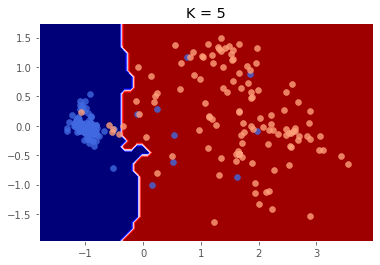

In [38]:
plotDecisionBoundary(knmodel, data_test, label_test)

The Red Area is the region of acceptance of a Malignant disease, while the blue area is the region of acceptance of a benign status.

- K-Neighbors is particularly useful when no other model fits our data well, as it is a parameter free approach to classification. **We don't have to worry about things like our data being linearly separable or not.** <br>
- Some of the caution-points to keep in mind while using K-Neighbors is that **our data needs to be measurable**. *If there is no metric for discerning distance between our features, K-Neighbors cannot help us*. As with all algorithms dependent on distance measures, **it is also sensitive to feature scaling**. K-Neighbors is also sensitive to perturbations and the local structure of your dataset, particularly at lower "K" values. <br>
On the other hand, with large "K" values, you have to be more cautious of the overall class distribution of your samples. If 30% of your dataset is labeled A and 70% of labeled B, with high enough "K" values, you might experience K-Neighbors unjustly giving preference to B labeling, even in those localities of your dataset that should be properly classified as A.

Usefull links:
- [Implementing K-Neighbors From Scratch](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)

[Click here to return to the top of the pag](#inizio)<a href='#inizio'></a>

<a id='svm'></a>
## SVM - Support Vector Machine

Support vector machines are a set of supervised learning algorithms that you can use for classification, regression and outlier detection purposes. SciKit-Learn has many classes for SVM usage, depending on your purpose. <br>
The one we'll be focusing on is Support Vector Classifier. <br>
Suppose you were a student. One afternoon on sports day, your friend challenges you to use any straight surface to separate a mixed group of biliard balls into even and odd sets. "No problem," you say, while laying a pool-stick between the two sets: <br>
<img src="resources/board.jpg"> <br>

Each sample in a dataset is just a point n-dimensional space, each dimension corresponding to a feature. Well, each billiard ball is a "sample" that has three features: <br>
1 - its number; <br>
2 - it's X-coordinate on the pool table; <br>
3 - it's Y-coordinate on the pool table. <br>
Stated in data-analysis lingo, you've just created a classifier that can correctly identify samples based on their features. <br>
Well done! Having impressed your senior, he decides to challenge you
further by adding more balls onto the table: <br>
<img src="resources/board2.jpg"> <br>

Your initial pool-stick placement still works for the most part, but there is probably a better spot to place it that might produce even better separation between the two sets.
This is still, no issue for you. You simply adjust the placement of your stick and voilà, it once again works perfectly: <br>
<img src="resources/board3.jpg"> <br>

Having moved the stick to a new position, something dawns on you. Where all the balls are on the table doesn't really matter. In fact, even if you had no idea where the 2-ball, the 7-ball, the 10-ball, and the 1-ball, etc. were placed, it wouldn't really make much of a difference in how you placed the stick. The only balls that you really need to be aware of when doing stick-placement, are those balls of either class that are closest to one
another.<br>
Support vector classifier behaves just like your stick placement. The two things it wishes to fulfill, in order of priority, are first finding a way to separate your data. It does this by looking at the balls from either class that are closest to one another, or in machine learning lingo, the support vectors. The algorithm then ensures it separates your data in the best way possible by orienting the boundary such that the gap, or
margin between it and your support vector samples is maximized. <br>
**SVC solves the classification problem by finding the equation of the
hyperplane (linear surface) which results in the most separation between two classes of samples. This allows you to confidently label your samples in a very fast and efficient way**. <br>
Let's say your senior notices how awesome you are at separating even and odd samples so decides to throw you a curve, by placing the remaining two balls at very difficult to separate spots on the table: <br>
<img src="resources/board4.jpg"> <br>

Your original instructions only were to use _**any straight surface** to separate a mixed group of billiard balls into even and odd sets_. At this point, it doesn't matter how you orient the pool stick: unless you're next to a black hole where space and time get warped out, you'll never be able to get the flat pool-stick, or any linear structure for that matter, to separate between even and odd featured balls now. <br>
So how do you handle the situation? The most mature way possible, of course—by flipping the table!<br>
A very calculated and coordinated table-flip that sends all of the balls flying into the air: <br>
<img src="resources/board5.jpg"> <br>

For some seconds all the balls are in the air, you can slide a large, straight, sheet of paper clean right between even and odd balls. <br>
Looking at the situation from the side of the table and seeing all the balls floating in the air, a very straight, single, linear-sheet of paper was able to split the two sets of balls, properly fulfilling the objective. This trick of yours is almost called the **kernel trick**, used in SVC and many other mathematical algorithms. <br>

*To be able to place the decision boundary between the billiard balls, you had to get them into the air by transforming them from their original three-dimensional featurespace (table position x, table position y, even/odd status) to a higher, 4D space, where the table position z-coordinate was added.* <br>

The kernel trick actually uses a nifty geometric shortcut to skip your table-flipping, transformation step, and just jump straight to the answer. The kernel is essentially a **similarity function**. *We give it two samples and it lets you know how similar they are.* <br>

This is pretty important because in SVC, your first priority is finding out which samples of opposite class are nearest to one another, so that you can position your decision boundary optimally. 

**What the kernel function essentially tells you is, given your current ball positions, how far apart would the balls have been, had you flipped the table**. <br>

This saves you the trouble of cleaning up the balls, and the embarrassment of (possibly) not having the strength to flip the table. <br>

There are [many types of kernels](https://scikit-learn.org/stable/modules/svm.html#svm-kernels) out there, and with SciKit-Learn, you can even define your own. Knowing what type of kernel to use, and under what circumstances to use it, are things that you'll have to discern as a domain expert in the field you are researching. A kernel that performs amazingly for one problem might fail entirely with a different problem. <br>

##### When to use SVC? 
**SVC is a classifier, so we could use it on any classification problem**.

Other algorithms like K-Neighbors are instantaneous with training, but require you traverse a complicated tree structure for each sample you want to classify. That can become a bottle-neck in realtime applications like self driving cars that need to rapidly be able to  tell the difference between a plastic bag and a large rock.

_One of the advantages of SVC is that once you've done the hard work of finding the hyperplane and its supporting vectors, the real job of classifying your samples is as simple as answering what side of the line is the point on? **This makes SVC a classifier of choice for problems where classfication speed is more critical than training speed**_.

SVC is extremely effective, even in high dimensional spaces. <br>
_With SVC, most of your dataset actually doesn't even matter. The only important samples are those closest to the decision boundary, called the **support vectors**_. _Those samples determine the position of the separating hyperplane and the size of its margin._

If you have a very large dataset consisting of many samples and want to speed it up simply by throwing away samples, a way to do so without sacrificing your classification accuracy too much would be by using SVC. <br>

_There may be cases where number your dataset has more features than the number of samples. Not all machine learning algorithms will be able to work with that, however such datasets aren't an issue for SVC._ <br>
In fact, at least conceptually, if you use the kernel trick then at some point your data will almost assuredly be at a higher dimensionality than the number of features, depending on which kernel you use. <br>

Lastly, **SVC is non-probabilistic, that means the resulting classification is calculated based off of the geometry of the dataset**.

Try to understand better the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) with an example:

In [51]:
import pandas as pd
import numpy as np

import matplotlib as mtl
import matplotlib.pyplot as plt
import matplotlib.figure as fig
from sklearn import svm

The dataset used in this lab comes from https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits
<br> The goal of the lab is to create a SVC to recognize handwritten numbers.

In [55]:
def load(path_train, path_test):
    # Load up the data.
    
    # You probably could have written this easily:
    with open(path_test, 'r')  as f: testing  = pd.read_csv(f)
    with open(path_train, 'r') as f: training = pd.read_csv(f)

    # The number of samples between training and testing can vary
    # But the number of features better remain the same!
    n_features = testing.shape[1]

    X_test  = testing.iloc[:,:n_features-1]
    X_train = training.iloc[:,:n_features-1]
    y_test  = testing.iloc[:,n_features-1:].values.ravel()
    y_train = training.iloc[:,n_features-1:].values.ravel()
  
    return X_train, X_test, y_train, y_test

In [56]:
# TODO: Pass in the file paths to the .tra and the .tes files:
X_train, X_test, y_train, y_test = load('resources/optdigits.tra', 'resources/optdigits.tes')

In [57]:
def peekData(X_train):
    # The 'targets' or labels are stored in y. The 'samples' or data is stored in X
    print("Peeking your data...")
    fig = plt.figure()

    cnt = 0
    for col in range(5):
        for row in range(10):
            plt.subplot(5, 10, cnt + 1)
            plt.imshow(pd.DataFrame(X_train.iloc[cnt,:]).values.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
            plt.axis('off')
            cnt += 1


Peeking your data...


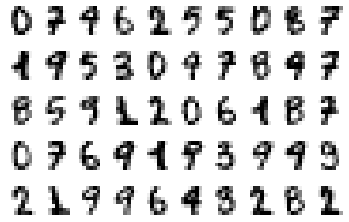

In [58]:
peekData(X_train)

Before to create an SVC classifier, take a look at the main parameters of SVC. <br>
Of the many configurable parameters for SciKit-Learn's svm.SVC class, the most important three in order are:

- **kernel**: Defines the type of kernel used with your classifier. The default is the radial basis function *rbf*, the most popular kernel used with support vector machines generally. SciKit-Learn also supports *linear, poly, sigmoid, and precomputed kernels*. You can also specify a user defined function to pre-compute the kernel matrix from your sample's feature space, which should be shaped [n_samples, n_samples].


- **C**: This is the penalty parameter for the error term. *Do you want your SVC to never miss a single classification? Or is having a more generalized solution important to you?* **The lower your C value, the smoother and more generalized your decision boundary is going to be. But if you have a large C value, the classifier will attempt to do whatever is in its power to squiggle and wiggle between each sample to correctly classify it.**


- **gamma**: This parameter's value is inversely proportional to the extent a single training sample's influence extends. **Large gamma values result in each training sample having localized effects only. Smaller values result in each sample affecting a larger area**. *The gamma values dictate how pronounced your decision boundary is by varying the influence of your support vector samples.*


- **random_state**: _SVC and support vector machines are theoretically a **deterministic algorithm**, meaning if you re-run it against the same input, it should produce identical output each time_. However SKLearn's SVC via libsvc implementation randomly shuffles your data during its probability estimation step. So to truly get deterministic execution, set a state seed.

Create an SVC classifier. Leave `C=1`, but set `gamma` to `0.001` and set the `kernel` to `linear`. Then train the model on the training data and labels:

In [59]:
print("Training SVC Classifier...")

from sklearn import svm
from sklearn.svm import SVC

# initial C = 1 and initial gamma = 0.001
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model = SVC(kernel='rbf', C=1, gamma=0.001)
model.fit(X_train, y_train)

Training SVC Classifier...


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In addition to the regular .fit(), .predict(), and .score() methods, SVC also allows you to calculate the distance of a set of samples to the decision boundary in highdimensional space using .decision_function(X), where X is a series of samples of the form [n_samples, n_features]. <br>
It is possible to use: <br>
- **support_** : Contains an array of the indices belonging to the selected support vectors; <br>
- **support_vectors** : The actual samples chosen as the support vectors; <br>
- **intercept_** : The constants of the decision function; <br>
- **dual_coef_** : Each support vector's contribution to the decision function, on a per classification basis. This has *similarities* to the weights of linear regression.



Calculate the score of your SVC against the testing data:

In [60]:
print("Scoring SVC Classifier...")

score = model.score(X_test, y_test)
print("Score:\n", round(score, 6))

Scoring SVC Classifier...
Score:
 0.982739


In [61]:
def drawPredictions(X_train, X_test, y_train, y_test):
    fig = plt.figure()
    fig.set_tight_layout(True)
    
    # Make some guesses
    y_guess = model.predict(X_test)

    num_rows = 5
    num_cols = 5

    index = 0
    for col in range(num_cols):
        for row in range(num_rows):
            fig.add_subplot(num_cols, num_rows, index + 1)
            
            # 8x8 is the size of the image, 64 pixels
            plt.imshow(pd.DataFrame(X_test.iloc[index,:]).values.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

            # Green = Guessed right
            # Red = Fail!
            fontcolor = 'g' if y_test[index] == y_guess[index] else 'r'
            plt.title('Label: %i' % y_guess[index], fontsize=10, color=fontcolor)
            plt.axis('off')
            index += 1


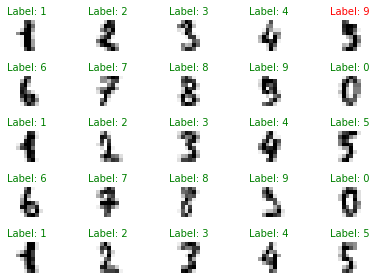

In [62]:
# Let's get some visual confirmation of accuracy:
drawPredictions(X_train, X_test, y_train, y_test)

- One of SVC's strong points is that even if we have fewer samples than dimensions, so long as the samples you do have are close to the decision boundary, there's a good chance your support vector classifier will do just well. <br>
Intuitively, those samples that are further away from the decision boundary are more clearly identifiable as belonging to their respective classes.
The samples closer to the decision boundary are more vague, and could easily be mistaken as belonging to the wrong class. <br>
<br>
- Although SVC can run on a subset of your features, if you get rid of too many, that is, if the dimensionality of your features is much greater than the number of samples, the quality of your decision boundary may still suffer. Again, depending on how far away those samples are from it.<br>
<br>
- Support vector machines, unfortunately, do not directly give probability estimates for what class a sample belongs to. If a sample is further from the decision boundary than the margin, then the algorithm is intuitively 100% sure of its classification. Any testing found within the margin has some probability of belonging to either class. <br>
<br>
- Since SVC is one of SciKit-Learn's highly configurable predictors, it's easy to start overfitting your models if you're not careful. Furthermore, unlike KNeighbors that does all its processing at the point of predicting, SVC does the majority of its heavy lifting at the point of training, so large training sets can result in sluggish training. If the ability to do realtime training and updating of your model is of great concern to you, you might have to consider another algorithm, depending on the size of your dataset.

Usefull links:
- [Intro to One-Class SVC](https://rvlasveld.github.io/blog/2013/07/12/introduction-to-one-class-support-vector-machines/) <br>
- [Practical Tips for SVC Usage](https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use) <br>
- [SVM A-Z in 45 Minutes | MIT Open Courseware with Patrick Winston](https://www.youtube.com/watch?v=_PwhiWxHK8o) <br>
- [Outlier Detection Example](https://scikit-learn.org/stable/modules/outlier_detection.html) <br>
- [Interactive SVM-JS](https://cs.stanford.edu/people/karpathy/svmjs/demo/) 


[Click here to return to the top of the pag](#inizio)<a href='#inizio'></a>

<a id='decision_tree'></a>
## Decision Trees


Decision trees are a supervised, probabilistic, machine learning classifier that are often used as decision support tools. Like any other classifier, they are capable of predicting the label of a sample, and the way they do this is by examining the probabilistic outcomes of your samples' features.
<br>
_Decision trees search for a structured set of rules to help the rapid classification of your dataset._ <br>
Decision trees have a few key attributes that make them unique: <br>
- The decision tree is structured as a flowchart diagram. It has a single, starting rootnode, and can contain one or more leaf nodes, and internal nodes; <br><br>
- Each node of the decision tree represents the test of single feature's value. For example, one node might test the feature named 'age' to see if the user is greater than 18 or not; <br><br>
- Each branch of the decision tree connects two nodes, an originating node, and a destination node. A branch represents an outcome of the test of the branch's originating node. In the case of the age > 18 test, there are two possible branches: True and False. Each of these two branches would connect the age > 18 node, to two destination nodes. <br><br>
- Each leaf node of the decision tree represents a classification. The end goal of the tree is to label your input samples, so each leaf fulfills that goal. <br><br>
Decision trees classify your data probabilistically based off of *entropy*, which can be thought of as '*purity*' or information gain. <br>
*Each decision tree models sequential consequences based off of their chance of **occurrence**, their resource cost, and their information gain, with the goal of maximizing the overall **purity** of class the samples stored in each leaf node.* 

Let's consider the following **EXAMPLE**: <br>
A teacher feels that there must be some relationship between how healthy his students eat, how many hours they spend studying, and their final grades.<br>
To discern the correlation, he asks 75 of his students how many hours a
week they spend studying. It seems reasonable to start with this question, as it should have the most impact on their grades. <br>
<img src='resources/histogram.jpg'> <br>

Fascinating! The teacher notices that 100% of the failing students spend less than 2.5 hours per week studying. Perhaps equally interesting is that of the students passing the course, some of them study a lot, yet others study just at the average level. To properly classify these students, more data is certainly needed. Being curious, the teacher asks the students another question: how health conscious are they with regards to their food, on a scale from 1-5. Would they prefer pepperoni pizza (1) or reach an apple (5)? <br>
<img src="resources/decision_tree.jpg"> <br>

Various answers come back, and something catches the teacher's eye. With only a single exception, every single students who doesn't take their health and eating habits seriously, by responding with less than 3.3 on the 5-scale survey, has lower ranking grades. <br>
Just as the teacher keeps asking questions to find out more details about his students so he can properly classify them, so to do decision trees like cleanly chopping away at your feature space to purify the class of your samples, based off of linear or straight decision boundaries. <br>
This is what a decision tree would look like for the above example:  
<img src="resources/decision_tree_1.jpg"> <br>

The root node starts with all samples, intermezzo. Value = [25, 25, 25] represents all the teacher's students who belong to three classes: slackers, status-quo, and overachievers, in that order. <br>
At the first node, there is a high level of impurity. <br>
The feature being considered by the root node is the number of hours spent studying per week, and decision being made is <= 2.45 or greater. <br>
In this tree, each left branch is a true response to the decision question, and each right branch is a false response. <br>
Those students that spend <= 2.45 hours per week all belong to the the first class, value = [25, 0, 0] and so that branch has an impurity of 0.0. <br>
Students that spend more than 2.45 hours per week studying consists of the rest of the student body. Exactly half of the students belong to one class, and exactly half belong to another class. <br>
In other words, this branch is as throughly mixed up as a binary classification can possible be. This is why impurity is set at 100% here. But by testing the health awareness feature, the teacher is able to considerably purify the resulting selections, such that only a single student sample is incorrectly classified on either side. <br>
##### When to use Decision Trees? 
- With decision trees, you can divide up your feature set into sections and boxes, which otherwise would not have been possible using a single, linear classifier. Due to this, **decision trees are indifferent to feature scaling**, unlike KNeighbors or PCA.<br>
- **Decision trees are a good tool to use when you want backing evidence to support a decision, or even while trying to convince someone of a view-point**. By mapping the various probabilities of outcomes, and their consequences, using a decision tree helps you paint the entire picture of the classification results of your features.


Try to understand better the [Decision Tree](https://scikit-learn.org/stable/modules/tree.html), and more specifically [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with an example:

In [63]:
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

We have to upload a mushroom dataset, where each species is identified as *definitely edible, definitely poisonous, or of unknown edibility and not recommended*. This latter class was combined with the poisonous one. <br>
<br>
Useful information about the dataset used in this assignment can be [found here](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names).
<br><br>
Load up the mushroom dataset into dataframe X and verify you did it properly, and that you have not included any features that clearly shouldn't be part of the dataset.
<br>
You should not have any doubled indices. <br>
You can check out information about the headers present in the dataset using the link we provided above. <br>
Also make sure you've properly captured any NA values.

In [66]:
X = pd.read_csv("resources/agaricus-lepiota.data", na_values='?')
X.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


We don't have the headers, it is necessary fix them. <br>
For doing this, it is possible take to reference to the link above:<br>
<img src="resources/decision_tree_2.jpg">

In [67]:
X.columns = ['classification', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']

In [68]:
X.head()

,classification,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [69]:
# An easy way to show which rows have nans in them:
X[pd.isnull(X).any(axis=1)]

,classification,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
3983,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4022,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4075,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4099,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4103,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


For this simple assignment, just drop any row with a nan in it, and then print out your dataset's shape:

In [70]:
X = X.dropna()
print("New shape's dataset:", X.shape)

New shape's dataset: (5643, 23)


Copy the labels out of the dataframe into variable `y`, then remove them from `X`.

Encode the labels, using the `.map()` trick.

In [71]:
y = pd.DataFrame(X['classification'].copy())
y.classification = y.classification.map({'e':0, 'p':1})
X = X.drop(['classification'], axis = 1)

Encode the entire dataframe using dummies:

In [72]:
X = pd.get_dummies(X,
                   columns=['cap_shape', 'cap_surface', 'cap_color', 
                            'bruises', 'odor', 'gill_attachment', 
                            'gill_spacing', 'gill_size', 'gill_color', 
                            'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 
                            'stalk_surface_below_ring', 'stalk_color_above_ring', 
                            'stalk_color_below_ring', 'veil_type', 'veil_color', 
                            'ring_number', 'ring_type', 'spore_print_color', 
                            'population', 'habitat'])

Split your data into `test` and `train` sets. Your `test` size should be 30% with `random_state` 7.

Please use variable names: `X_train`, `X_test`, `y_train`, and `y_test`:

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

Create an DT classifier. No need to set any parameters:

In [74]:
def dct(X_train, y_train):
    dct = tree.DecisionTreeClassifier()
    dct.fit(X_train, y_train)
    
    DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=9, 
                           min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                           random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                           class_weight=None, presort=False)
    
    return dct

SciKit-Learn's trees are quite configurable: <br>
- **Criterion**: By default, SciKit-Learn uses Gini, which is an impurity rating. Alternatively, you could also make use of information gain, or entropy instead. <br>
- **Splitter**: Lets you control of the algorithm chooses the best split or not.<br>
- **Max_features**: One of the possible splitter options for splitter above is called 'best'. SciKit-Learn runs a bunch of tests on your features to figure out which mechanism should be used when searching for the best split. This parameter limits the number of features to consider while doing this. 

After you've gone ahead and trained your tree, you can of course get back all the end-node, leaf classifications that the tree has reached, as well as the entire tree object if you like.<br>
For those leaf nodes that aren't 100% pure due to having samples belonging to multiple classes within them, then the end-result class the leaf takes is a weighted mode vote, based on the number of each class label inside of it. <br>
<br>
You can also get back a **feature_importances** vector that stores, in order of
importance, the features that used to make the labeling decisions of your tree.

Train the classifier on the `training` data and labels; then, score the classifier on the `testing` data and labels:

In [75]:
dct = dct(X_train, y_train)
score = dct.score(X_test, y_test)

In [76]:
print("High-Dimensionality Score:", round((score*100),3))

High-Dimensionality Score: 100.0


Use the code on the course's SciKit-Learn page to output a .DOT file, then render the .DOT to .PNGs.

You will need graphviz installed to do this. On macOS, you can `brew install graphviz`. On Windows 10, graphviz installs via a .msi installer that you can download from the graphviz website. Also, a graph editor, gvedit.exe can be used to view the tree directly from the exported tree.dot file without having to issue a call. On other systems, use analogous commands.

If you encounter issues installing graphviz or don't have the rights to, you can always visualize your .dot file on the website: http://webgraphviz.com/.

In [77]:
# With the following sintax we will create a .dot file with the code for visualizing th tree
tree.export_graphviz(dct, out_file='tree.dot', feature_names=X.columns)

We can use the website: http://webgraphviz.com/ and attach the code for visualizing the following tree.<br>


<img src="resources/decision_tree_3.jpg">

Decision Trees have some high points which make them desirable for machine learning: <br> 
- They're easy to interpret, by linearizing them into IF .. AND .. AND .. THEN .. blocks. Both training and testing speed are fast. <br>
- They work with either categorical or continuous features, with or without encoding, and are invariant to feature of scaling.

Moreover, *if configured properly, they can pretty decently handle irrelevant and noisy features*. <br>
Decision trees help you decide the worst, best and expected classification labels given various scenarios. <br><br>
_While using them, keep in mind that **your data still must be multivariate linearly separable for classification to work**._<br> The decision surfaces of the tree are still flat, even though they can intersect at angles. <br>
Also considering how malleable and how many parameters they have, _it's easy to get carried away and **overfit** your tree unless, particularly if you don't fully test against an independent testing set._ <br>
A good sign of an overfit tree is its very complex structure, and it having branches that reach out erroneously just to correctly label single records, due to their sensitivity to small, local fluctuations in your training data. <br>
<br>
So for recap:
- Unlike SVMs, the accuracy of a Dtree doesn't decrease when you include irrelevant features; <br>
- Unlike KNeighbors, both training and predicting with a DTree are relatively fast operations; <br>
- Unlike PCA / IsoMap, DTrees are invariant to monotonic feature scaling and transformations; <br>
- Moreover, a trained DTree model is readily human inspectable.

Usefull links:
- [Sklearn and D3](https://planspace.org/20151129-see_sklearn_trees_with_d3/);<br>
- [Information Gain and Metrics](https://en.wikipedia.org/wiki/Decision_tree_learning#Metrics); <br>
- [Machine Learning with Decision Tree](http://pages.cs.wisc.edu/~jerryzhu/cs540/handouts/dt.pdf); <br>
- [Entropy](https://www.ics.uci.edu/~welling/teaching/273ASpring10/recitation4_decision_tree.pdf)

[Click here to return to the top of the pag](#inizio)<a href='#inizio'></a>

------------------------

<a id='ensemble_learning'></a>
# Ensenble Learning and Random Forest

Suppose you pose a complex question to thousand of random people, then aggregate their answers. In many cases you will find that this aggregated answer is better than an expert's answer.  
This is called: *wisdom of the crowd*

In Machine Learning is similar, if you aggregate the predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor.  
A group of predictors is called an **ensemble**; thus this technique is called *Ensemble Learning*, and an Ensemble Learning algorithm is called an *Ensemble Method*

<img src="resources/ensemble_models.png">

<img src="resources/ensemble_predict.png">

<a id='bagging'></a>
### Bagging and Pasting



One way to get a diverse set of classifiers is to use very different training algorithms with an ensemble method.

Another approach is to use the same training algorithm for every predictor and train them on different random subsets of training set.  
When sampling is performed with replacement, this method is called *bagging*

In other words, both bagging and pasting allow training instances to be sampled several times across multiple predictors, but only bagging allows training instances to be sampled several times across multiple predictors, but only bagging allows training instances to be sampled several times for the same predictor.

Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. The aggregation function is typically the *statistical mode* (the most frequent prediction, just like a hard voting classifier) for classification, or the average for regression.

Each individual predictor has a higher bias than if it were trained on the original trainingset, but aggregation reduces both bias and variance.
Generally, the net result is that the ensemble has a similar bias but a lower variane than a single predictor trained on the original training set.

All predictord in the bagging mode can be trained in parallel, via different CPU cores or event different servers.
Also the predictions can be made in parallel.
This is one of the reasons bagging and pasting are such popular methods: they scale very well in every machine configuration.

<img src="resources/bagging.png">

<a id='random_forest'></a>
## Random Forest

Random Forest is an ensemble of Decision Trees, generally trained via bagging method (or something pasting).

If not carefully pruned, decision trees will deep-learn irregular patterns and data outliers. They do this so well that they rapidly overfit the training set, resulting in excellent training data recall... but poor predictive abilities.<br>
_This is exactly the problem random forests aim to solve_. <br>
A single decision tree, tasked to learn a dataset might not be able to perform well due to the outliers, and the breadth and depth complexity of the data. <br> 
So instead of relying on a single tree, **random forests rely on a forest of cleverly grown decision trees**. _Each tree within the forest is allowed to become highly specialized in a specific area, but still retains some general knowledge about most areas._ <br>
When a random forest classiffier, it is actually each tree in the forest working together to cast votes on what label they think a specific sample should be assigned. <br>

<br>
Random forests make use of two techniques when training: <br>
1) One occurs at the forest level. <br>
2) the other at the individual tree level. <br>
<br>
First, like any supervised classifier, you'll pass in a training set of samples along with "truth" labels when you create an instance of the class. <br> Instead of sharing the entire dataset with each decision tree, the forest performs an operation which is essential a train / test split of the training data. Each decision tree in the forest randomly samples from the overall training data set. <br>
Through doing so, each tree exist in an independent subspace and the variation between trees is controlled. This technique is known as **tree bagging**, or **bootstrap aggregating**. <br>
Tree bagging increases the accuracy of decision trees because while an individual decision tree might become hypersensitive to outliers and localized features, once all the results are averaged, the fringe results get blurred out. <br>
Therefore using random forests over a single tree decrease the variance of your classification results, without increasing the bias the way KNeighbor does when K is set too high. This technique only works if the individual trees are not correlated. If they were all trained on the same training set, they would only reinforce eache other's decision. The bootstrapping or randomization of samples each tree is trained upon take care of that. <br>

<br>
Random forests also use one more trick. In addition to the tree bagging of training samples at the forest level, _each individual decision tree further '**feature bags**' at each node-branch split._ <br>
This is helpful because some datasets contain a feature that is very correlated to the target (the 'y'-label). By selecting a random sampling of features every split, if such a feature were to exist, it wouldn't show up on as many branches of the tree and there would be more diversity of the features examined. <br>
<br>
After fitting the forest, a prediction can be made for unseen samples by using the majority vote label assigned from each tree. SciKit-Learn gives you access to an array containing each of the trained trees in the forest, in case you'd like to inspect them individually. SciKit-Learn also supports doing regression with decision trees and random forests.<br>
In these cases, the output needs to be a continuous variable, and is calculated as the average result of each tree. <br>
<br>

Since each tree within the forest is only trained using a subset of the overall training set, the forest ensemble has the ability to error test itself. It does this by scoring each tree's predictions against that tree's out-of-bag samples. A tree's out of bag samples are those forest training samples that were withheld from a specific tree during training. <br>
There's nothing unique about splitting your data between training and testing sets except that you have an independent set of unseen samples to validate the accuracy of your training. <br>
Part of the random forest algorithm is the creation of independent sets for the training of each tree, so an overall out-of-bag error metric can be calculated for the forest ensemble. This error value is defined as the mean prediction error for each training samples using only those trees that didn't have the sample in their bootstrap. <br>
<br>
One of the advantages of using the out of bag error is it eliminates the need for you to split your data into a training / testing before feeding it into the forest model, since that's part of the forest algorithm.<br> However using the out-of-bag error metric often underestimates the actual performance improvement, and the optimal number of training iterations. Due to this, SciKit-Learn recommends maintain separate training and testing sets.

<img src="resources/random_forest.png">

Try to understand better the [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with an example:

Grab the DLA HAR dataset from:

- http://groupware.les.inf.puc-rio.br/har
- http://groupware.les.inf.puc-rio.br/static/har/dataset-har-PUC-Rio-ugulino.zip

After extracting it out, load up the dataset into dataframe named `X` and do your regular dataframe examination:

In [78]:
import pandas as pd
import time

In [81]:
x = pd.read_csv('resources/dataset-har-PUC-Rio-ugulino.csv', sep=';')
x.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,"1,62",75,"28,6",-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,Woman,46,"1,62",75,"28,6",-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,Woman,46,"1,62",75,"28,6",-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,Woman,46,"1,62",75,"28,6",-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,Woman,46,"1,62",75,"28,6",-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


In [82]:
x.shape

(165633, 19)

In [83]:
# Visualize any null element
x[pd.isnull(x).any(axis=1)]

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class


There aren't any null element. <br>
Encode the gender column such that: 0 is male, and 1 as female:

In [84]:
x.gender = x.gender.map({'Woman':1, 'Man':0})

Clean up any columns with commas in them so that they're properly represented as decimals:

In [85]:
x['how_tall_in_meters'] = [i.replace(',', '.') for i in x['how_tall_in_meters']]
x['body_mass_index'] = [i.replace(',', '.') for i in x['body_mass_index']]

In [86]:
x.dtypes

user                  object
gender                 int64
age                    int64
how_tall_in_meters    object
weight                 int64
body_mass_index       object
x1                     int64
y1                     int64
z1                     int64
x2                     int64
y2                     int64
z2                     int64
x3                     int64
y3                     int64
z3                     int64
x4                     int64
y4                     int64
z4                     int64
class                 object
dtype: object

Convert any column that needs to be converted into numeric use `errors='raise'`. This will alert you if something ends up being problematic.

In [87]:
x.how_tall_in_meters = pd.to_numeric(x.how_tall_in_meters, errors='raise')
x.body_mass_index = pd.to_numeric(x.body_mass_index, errors='raise')
x.z4 = pd.to_numeric(x.z4, errors='raise')

In [88]:
x.dtypes

user                   object
gender                  int64
age                     int64
how_tall_in_meters    float64
weight                  int64
body_mass_index       float64
x1                      int64
y1                      int64
z1                      int64
x2                      int64
y2                      int64
z2                      int64
x3                      int64
y3                      int64
z3                      int64
x4                      int64
y4                      int64
z4                      int64
class                  object
dtype: object

Okay, now encode your `y` value as a Pandas dummies version of your dataset's `class` column:

In [89]:
y = pd.DataFrame(x['class'].copy())
y = pd.get_dummies(y, columns=['class'])
y.head()

,class_sitting,class_sittingdown,class_standing,class_standingup,class_walking
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


Get rid of the user and class columns.

In [90]:
x = x.drop(['user', 'class'], axis = 1)

In [91]:
x.describe()

,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
count,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000,165633.000000
mean,0.612040,38.265146,1.639712,70.819408,26.188522,-6.649327,88.293667,-93.164611,-87.827504,-52.065047,-175.055200,17.423515,104.517167,-93.881726,-167.641448,-92.625171,-159.650891
std,0.487287,13.184091,0.052820,11.296527,2.995777,11.616238,23.895829,39.409423,169.435194,205.159763,192.816615,52.635388,54.155843,45.389646,38.311342,19.968610,13.221036
min,0.000000,28.000000,1.580000,55.000000,22.000000,-306.000000,-271.000000,-603.000000,-494.000000,-517.000000,-617.000000,-499.000000,-506.000000,-613.000000,-702.000000,-526.000000,-537.000000
25%,0.000000,28.000000,1.580000,55.000000,22.000000,-12.000000,78.000000,-120.000000,-35.000000,-29.000000,-141.000000,9.000000,95.000000,-103.000000,-190.000000,-103.000000,-167.000000
50%,1.000000,31.000000,1.620000,75.000000,28.400000,-6.000000,94.000000,-98.000000,-9.000000,27.000000,-118.000000,22.000000,107.000000,-90.000000,-168.000000,-91.000000,-160.000000
75%,1.000000,46.000000,1.710000,83.000000,28.600000,0.000000,101.000000,-64.000000,4.000000,86.000000,-29.000000,34.000000,120.000000,-80.000000,-153.000000,-80.000000,-153.000000
max,1.000000,75.000000,1.710000,83.000000,28.600000,509.000000,533.000000,411.000000,473.000000,295.000000,122.000000,507.000000,517.000000,410.000000,-13.000000,86.000000,-43.000000


Create an RForest classifier named `model` and set `n_estimators=30`, the `max_depth` to 10, `oob_score=True`, and `random_state=0`:

In [92]:
from sklearn.ensemble import RandomForestClassifier

def model(x_train, y_train):
    model = RandomForestClassifier(n_estimators=30, max_depth=10, oob_score=True, random_state=0)
    model.fit(x_train, y_train)
    
    return model


Only a few parameters here are different from the regular DecisionTreeClassifier, so you can use the RandomForestClassifier rather interchangeably when training or predicting. <br>
However know that a single .tree_ structure no longer exist. Instead, you
can retrieve a specific tree's decision tree-graph from within the forest.

Some optional parameters you can pass in while instatiating your model include: <br>
- **n_estimators**: Controls the density of the forest ensemble; <br>
- **bootstrap**: Also known as bagging. Every trained tree is grown using an independently drawn subset of your input data. As such, training samples not used for training an individual tree are considered _out-of-bag_ for that one tree; <br>
- **obb_score**: Controls whether to use out-of-bag samples to estimate a generalization error. By default, this is turned off, with the assumption that you'll be using a random forest just like any other SciKit-Learn estimator, and handling the splitting of your training/testing data manually, along with its scoring.

If, for some reason, you're interested in examining the structure of the individual decision trees that comprise your forest, you can do so using the **.estimators_** attribute of the random forest class. <br> Additionally, if **oob_score** = True was set as a parameter, and assuming you had enough trees and data samples for it to actually be possible, the .obb_score attribute will have calculated an accuracy metric for you using an averaged out-of-bag estimates for your training samples. The out-of-bag samples for a particular tree are those training samples that were withheld during the training of that particular tree.

Split your data into `test` / `train` sets. Your `test` size can be 30%, with `random_state` 7. Use variable names: `X_train`, `X_test`, `y_train`, and `y_test`:

In [93]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [94]:
print("Fitting...")
s = time.time()

# TODO: train your model on your training set

model = model(x_train, y_train)

print("Fitting completed in: ", time.time() - s)


Fitting...
Fitting completed in:  5.565131902694702


Display the OOB Score of your data:

In [95]:
print("Scoring...")
s = time.time()

# TODO: score your model on your test set

score = model.score(x_test, y_test)

print("Score: ", round(score*100, 3))
print("Scoring completed in: ", time.time() - s)

Scoring...
Score:  96.052
Scoring completed in:  0.3798670768737793


Random forest almost always boosts your scoring accuracy above that of a single decision tree. <br>
Like other ensemble methods, they are effortlessly parallelizable,
because you can have independent trees being trained on distinct cores and only need to get a mode vote of their classifications once you attempt to predict or score your data. <br>
Two drawbacks of random forest are that since you're now planting an entire forest as opposed to a single tree, both training and prediction execution times suffer tremendously. Particularly, training is an order of magnitude more time consuming. <br>
You also lose the ability to inspect the resulting structure of your classifier as easily. <br>
No longer can you just print out a .dot-file flow chart since no single flowchart encompasses the forest, and your results aren't strictly based on following a single logic diagram. <br>
Along the same lines, the forest can no longer be linearized into IF...THEN blocks anymore. <br>
Even with all that said, given the added accuracy performance-boost, if a high level of correctly classified samples is what you need, then moving from decision trees to random forest should be an easy choice to make.

Usefull links:
- [Sklearn Ensemble Methods](https://scikit-learn.org/stable/modules/ensemble.html);

<a id='feature_importance'></a>
### Feature Importance

Another great quality of Random Forests is that they make it easy to measure the relative importance of each feature.

Scikit-Learn measures a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest). More precisely, it is a weighted average, where each node's weight is equal to the number of training samples that are associated with it.

An Example:

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])

for name , score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10206591278682897
sepal width (cm) 0.023932588008737543
petal length (cm) 0.4293146470805274
petal width (cm) 0.444686852123906


So random forest are very handy to get a quick understanding of what features actually matter, in particular if you need to perform feature selection.

<a id='boosting'></a>
## Boosting

*Boosting* (originally called *hypotesis boosting*) refers to any Ensemble method that can combine several weak learners into a strong learner.  
The general idea of most boosting methods is to train predictors sequentially, each trying to corrects its predecessor.

There are many boosting methods available, but by far the most popular are **AdaBoost** also called: Adaptive Boosting and also the *Gradient Boosting*.

<img src="resources/adaboost_02.png">

<a id='adaboosting'></a>
### AdaBoosting

<img src="resources/adaboost_01.png">

For example, when training an AdaBoost classifier or regressor, the algorithm first trains a base classifier or regressor (such a Decision Tree) and uses it to make predictions on the training set.

The algorithm then increases the relative weight of misclassified training instances.  
Then it trains a second classifier, using the update weights, and again makes predictions on the training set, updates the instance weights, and so on...

Once all predictors are trained, the ensemble makes predictions very much like bagging or pasting, except that predictors have different weights depending on their overall accuracy on the weighted training set.

WARNING: there is one important drawback to this sequential learning technique: it's useful and powerful, but it cannot be parallelized (or only partially), since each predictor can only be trained after the previous predictor has been trained and evaluated.  
As a result, it does not scale as well as bagging or pasting.


Example with Adaboost  
https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe  
https://www.wikiwand.com/en/AdaBoost


<a id='stacking'></a>
## Stacking

One last ensemble method is called stacking (short name for stacked generalization).

It is based on a simple idea: instead of using trivial functions (such as hard voting) to aggregate the predictions of all predictiors in an ensemble, why don't we train a model to perform this aggregation ?

Each of the bottom three predictors predicts a different value, and then the final predictor (called a blender, or a meta learner) takes there predictions as inputs and makes the final prediction.

Remember: To train the blender, a common approach is to use a hold-out set.  
First the training set is split into two subset. The first subset is used to train the predictors in the first layer.  
Next, the first layer's predictors are used to make predictions on the second (held-out) set.  
This ensure that the predictions are "clean", since the predictors never saw there instances during training.

Unfortunately, Sklearn does not support stacking directly, but it is not too hard to roll out your implementation.

----------------------------------

<a id='unsupervised'></a>
# Unsupervised Algorithms

Real world datas come loaded with observational features, but aren't *labeled*. <br>
With **unsupervised clustering** it is possible automatically group similar samples based solely on their features. <br>
Since the goal of clustering is the grouping of similar records, we have to first define what similarity means. But, without a generalizable way to group the samples, deterministic computers can't cluster your data. <br>
What's needed is a *systematic means of measuring the overall similarity between our samples*. <br>
<br>
**Clustering groups samples that are similar within the same cluster.** <br>
The more similar the samples belonging to a cluster group are (and conversely, the more dissimilar samples in separate groups), the better the clustering algorithm has performed. <br>
Since clustering is an unsupervised algorithm, this similarity metric must be measured automatically and based solely on our data. <br>
<br>
The implementation details and definition of similarity are what differentiate the many clustering algorithms. The mainly are:
- **PCA and ISOMAP** (we've already seen it in the Transforming notebook) <br>
- **K-Means** <br>
- **DBSCAN** <br>
- **Gaussian Mixture Models** <br>

**Clustering is used in a wide variety of applications, including these:**

- *Customer segmentation*  
You can cluster your customers based on their purchases and their activity on your website. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, customer segmentation can be useful in *recommender systems* to suggest content that other users in the same cluster enjoyed.


- *Data analysis*  
When you analyze a new dataset, it can be helpful to run a clustering algorithm, and then analyze each cluster separately


- *Dimensional reduction technique*  
One a dataset has been clustered, it is usually possible to measure each instance's affinity with each cluster (affinity is any measure of how well an instance fits into a cluster). Each instance's feature vector **x** can then be replaced with the vector of its cluster affinities. If there are k clusters, then this vector is k-dimensional. This vector is typically much lower-dimension than the original feature vector, but it can preserve enough information for further processing.


- *Anomaly detection (also called outlier detection)*  
Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number o requests per second. Anomaly detection is particularly useful in detecting defects in manufactoring, or for *fraud detection*


- *Semi-supervised learning*  
If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This technique can greatly increase the number of labels available for a subsequent supervised learning algorithm, and thus improve its performance.


- *Search engines*  
Some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is use the trained clusterin model to find this image's cluster, and you can then simply return all the images from this cluster.


- *Segment an image*  
By clustering pixels according to their color, then replacing each pixel's color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in the images. Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the countour of each object.

There are a lots of unsupervised algorithms, here some comparison on sklearn library:
![Unserpervised Algorithms](resources/ClusteringAlgos.png)

<a id='k_means'></a>
## K-Means

*K-Means define **similarity** iteratively separating our samples into a user-specified number of "K" cluster groups of roughly equal variance.*<br>
Cluster groups are defined by their geometric cluster center, its **centroid**. <br>
*A **cluster** is a set of similar samples, while a **centroid** is just the mean feature-position of all samples assigned to the cluster*. <br>
Every sample in our dataset is assigned to the centroid nearest to it, so if we have a sample that is 10 units away from CusterA's centroid, and 100 units away from ClusterB's, the sample is assigned to ClusterA. <br>
<br>
**SciKit-Learn's K-Means implementation only natively supports numeric features types.** <br>
##### How K-Means Algorithm works?
K-Means starts by placing a user-specified number of "K" cluster centers in our feature space. <br>
For choosing the first centroid placement is possible use the position of some random samples as the centroids' starting spots. <br>
Each cluster then takes ownership of the samples nearest to its centroid, and every sample can only be assigned as single cluster. *'Nearest'* is a value that has to be evaluated and in SciKit-Learn, it is defined as the multivariate, n-dimensional Euclidean distance between the sample and the centroid. After this, the centroid location is updated to be the mean value of all samples assigned to it. The mean value is calculated by feature, so the centroid position ends up being a n-length vector within our feature space. <br>
The assignment and update steps repeat until there are no more changes in either, at which point the algorithm has converged. K-Means always converges, and it is very fast at doing so. <br>
The technical explanation for what K-Means does is minimizing the within-cluster inertia, or **sum of squared errors** between each sample and its respective centroid. <br>
**The initial centroid assignment affects the results.** *Two runs of K-means might produce different outcomes*, but the quality of their cluster assignments are ranked by looking at which run has the smallest overall inertia (sum of squared errors).
<br>
##### When to use K-Means Clustering?
K-Means clustering is best suited when we have a good idea of the number of distinct clusters our unlabeled dataset should be segmented into.
Generally, the output of K-Means is used in two ways: 
- **To separate our unlabeled data into K groups;** <br>   
- **To find and use the resulting centroids**: an example of this usage can be *a company looking for ideal locations to open a limited number of branches, based on the location of their customers*. <br> Moreover, it is possible to use the centroid to 'compress' our data. By referring to the centroid rather than the data sample, the number of unique values is reduced, which optimizes the execution speed of other algorithms.


Example: <br>
Open the csv "Crimes_-_2001_to_present.csv" that contains all the Crimes about gambling made in Chicago since 2001. <br>
We try to identify some cluster identifying the mainly area (cluster) where there was this kind of crime.

In [97]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.cluster import KMeans
from sklearn import preprocessing

In [98]:
df = pd.read_csv('./resources/Crimes_-_2001_to_present.csv', header = 0)
df_1 = df
df_1.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10002677,HY191890,03/20/2015 01:13:00 PM,020XX W 70TH ST,1661,GAMBLING,GAME/DICE,STREET,True,False,...,17.0,67.0,19,1164027.0,1858234.0,2015,02/10/2018 03:50:01 PM,41.766615,-87.674337,"(41.766615006, -87.674337321)"
1,10003802,HY193541,03/21/2015 06:45:00 PM,042XX W MONROE ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,26.0,19,1148136.0,1899324.0,2015,02/10/2018 03:50:01 PM,41.879691,-87.731530,"(41.879691121, -87.731529667)"
2,10003937,HY193663,03/21/2015 07:55:00 PM,032XX W LAWRENCE AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,SMALL RETAIL STORE,True,False,...,39.0,14.0,19,1154071.0,1931710.0,2015,02/10/2018 03:50:01 PM,41.968445,-87.708871,"(41.968444682, -87.708871059)"
3,10004429,HY194332,03/22/2015 01:57:00 PM,019XX S ST LOUIS AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,24.0,29.0,19,1153407.0,1890195.0,2015,02/10/2018 03:50:01 PM,41.854537,-87.712418,"(41.854537081, -87.71241763)"
4,10005837,HY195964,03/23/2015 08:40:00 PM,039XX W CERMAK RD,1661,GAMBLING,GAME/DICE,PARKING LOT/GARAGE(NON.RESID.),True,False,...,24.0,29.0,19,1150290.0,1889088.0,2015,02/10/2018 03:50:01 PM,41.851561,-87.723887,"(41.851560618, -87.723887245)"


In [99]:
print("Shape's dataset:", df_1.shape)

Shape's dataset: (14267, 22)


In [100]:
# Count null rows for each feature
df_1.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       0
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                    1124
Community Area          1124
FBI Code                   0
X Coordinate              98
Y Coordinate              98
Year                       0
Updated On                 0
Latitude                  98
Longitude                 98
Location                  98
dtype: int64

In [101]:
# We'll drop any rows that have nans in them
df = df.dropna(axis=0)
df_1 = df_1.dropna(axis=0)

In [102]:
df_1.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [103]:
# Coerce the Date feature (which is currently a string object) into real date

df.Date = pd.to_datetime(df.Date, errors='coerce')
df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')
df_1.Date = pd.to_datetime(df_1.Date, errors='coerce')
df_1['Updated On'] = pd.to_datetime(df_1['Updated On'], errors='coerce')


In [104]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [107]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', c='navy', alpha=0.3)
    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    df = df.loc[:, ['Longitude', 'Latitude']]
    
    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    model = KMeans(n_clusters=7)
    model.fit(df)
    KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
    
    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='*', c='red', alpha=0.5, linewidths=3, s=169)


As we can see in the code above or in the [Isomap page](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), the most important factor is **n_cluster**, the "K" number of clusters you want K-Means to place for you. Also experiment with different initialization methods, including rolling our own and in the positions as an NDArray shaped as [n_clusters, n_features]. 

[[-87.7096286   41.87813663]
 [-87.66466597  41.77272673]
 [-87.68506657  41.98175614]
 [-87.58221371  41.75220942]
 [-87.75688178  41.89341893]
 [-87.63108338  41.69664745]
 [-87.61927318  41.80309811]]


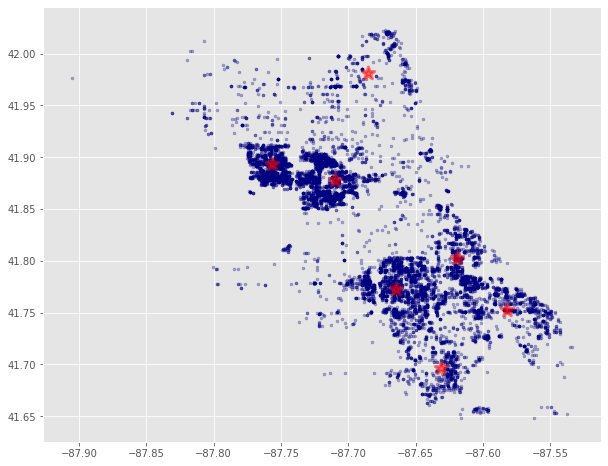

In [108]:
# Try doKMeans function defined above with the first dataset "df"
doKMeans(df)

**K-Means is only really suitable when we have a good estimate of the number clusters that exist in our unlabeled data.** <br>
There are many estimation techniques for approximating the correct number of clusters, but we'll have to get that number before running K-Means. <br>
Even if we do have the right number of clusters selected, **the result produced by K-Means can vary depending on the initial centroid placement.** So if we need the same results produced each time, our centroid seeding technique also needs to be able to reliably produce the same placement given the same data. <br>
Due to the centroid seed placement having so much of an effect on our clustering outcome, we have to be careful since it is possible to have centroids with only a single sample assigned to them, or even no samples assigned to them in the worst case scenario. <br><br>
Two other key characteristics of K-Means are that: <br>
- **It assumes our samples are length normalized, and as such, is sensitive to feature scaling**. <br>
- **It also assumes that the cluster sizes are roughly spherical and similar**; this way, the nearest centroid is always the correct assignment.
<br>
<br>
Useful links:<br>
- [+30 Methods: On determining the Number of Clusters](https://link.springer.com/article/10.1007%2FBF02294245) <br>
- [Initial Centroid Positioning](http://www.mecs-press.org/ijisa/ijisa-v4-n1/IJISA-V4-N1-3.pdf)

It's also possibile to compute kmeans with a mini batch algorithm to reduce the computational time over large dataset and memory leaks:  
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans

[Click here to return to the top of the pag](#inizio)<a href='#inizio'></a>

<a id='hierarchical_clustering'></a>
## Hierarchical clustering

Hierarchical clustering methods make fewer distributional assumptions when compared to K-means methods. However, K-means methods are generally more scalable, sometimes very much so. 

Is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.

See the Wikipedia page for more details: https://www.wikiwand.com/en/Hierarchical_clustering  
You can also check this easy explanation to have more details about:  
https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

**How hierarchical clustering works**
Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps:
1. identify the two clusters that are closest together
2. merge the two most similar clusters.

This iterative process continues until all the clusters are merged together.

**Measures of distance (similarity)**
The distance between two clusters (in the step 1) can be calculates using some distance metrics (euclidean, cosine, manhattan, ....)

The choice of distance metric should be made based on theoretical concerns from the domain of study. That is, a distance metric needs to define similarity in a way that is sensible for the field of study. For example, if clustering crime sites in a city, city block distance may be appropriate. Or, better yet, the time taken to travel between each location. Where there is no theoretical justification for an alternative, the Euclidean should generally be preferred, as it is usually the appropriate measure of distance in the physical world.

Several different **distance metrics** are used to compute linkage functions
- **Euclidian** or **l2** distance is the most widely used. This metric is only choice for the Ward linkage method. 
- **Manhattan** or **l1** distance is robust to outliers and has other interesting properties. 
- **Cosine** similarity, is the dot product between the location vectors divided by the magnitudes of the vectors. Notice that this metric is a measure of similarity, whereas the other two metrics are measures of difference. Similarity can be quite useful when working with data such as images or text documents. 

**Linkage Criteria**
After selecting a distance metric, it is necessary to determine from where distance is computed (to execute the step 2: merging). For example, it can be computed between the two most similar parts of a cluster (single-linkage), the two least similar bits of a cluster (complete-linkage), the center of the clusters (mean or average-linkage), or some other criterion. Many linkage criteria have been developed.

As with distance metrics, the choice of linkage criteria should be made based on theoretical considerations from the domain of application. A key theoretical issue is what causes variation. For example, in archeology, we expect variation to occur through innovation and natural resources, so working out if two groups of artifacts are similar may make sense based on identifying the most similar members of the cluster.

The **linkage function** can be computed in a number of ways:
- **Ward** linkage measures the increase in variance for the clusters being linked,
- **Average** linkage uses the mean pairwise distance between the members of the two clusters, 
- **Complete** or **Maximal** linkage uses the maximum distance between the members of the two clusters.


Hierarchical clustering creates clusters by either a **divisive** method or **agglomerative** method. The divisive method is a "top down" approach starting with the entire dataset and then finding partitions in a stepwise manner.  The later method is known as agglomerative clustering is a "bottom up** approach.

**Agglomerative Method**
1. The **linkage distances** between each of the data points is computed.
2. Points are clustered pairwise with their nearest neighbor. 
3. Linkage distances between the clusters are computed.
4. Clusters are combined pairwise into larger clusters.
5. Steps 3 and 4 are repeated until all data points are in a single cluster. 





In [7]:
import numpy.random as nr
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [8]:
#Generate new data to test (distance)
def make_dist(mean, cov, dist_num, n = 100, seed = 123):
    nr.seed(seed)
    sample = nr.multivariate_normal(mean, cov, n) # Compute the 2-d Normally distributed data
    sample = np.column_stack((sample, np.array([dist_num]*n))) ## Add the distribution identifier
    print('Shape of sample = ' + str(sample.shape))
    return(sample)

#Plot function for separate samples
def multiple_plot_dat(sample1, sample2, sample3):
    plt.scatter(sample1[:,0], sample1[:,1], color = 'blue')
    plt.scatter(sample2[:,0], sample2[:,1], color = 'orange')
    plt.scatter(sample3[:,0], sample3[:,1], color = 'green')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Sample data')
    plt.show()
    
#Plot samples with clustering assignement
def plot_clusters(sample, assignment):
    col_dic = {0:'blue',1:'green',2:'orange',3:'gray',4:'magenta',5:'black'}
    colors = [col_dic[x] for x in assignment]
    plt.scatter(sample[:,0], sample[:,1], color = colors)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Sample data')
    plt.show()

Now we can creates synthetic data from bivariate Normal distribution with mean of $\{ 0,0 \}$ and a covariance matrix:

$$cov(X) =  \begin{bmatrix}
  1.0 & 0.4 \\
  0.4 & 1.0
 \end{bmatrix}$$


Shape of sample = (100, 3)
Shape of sample = (100, 3)
Shape of sample = (100, 3)


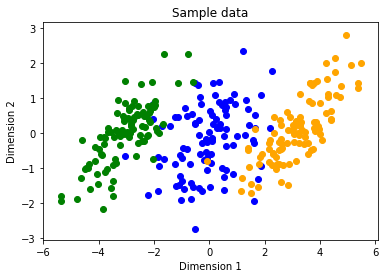

In [9]:
#First sample of data
cov = np.array([[1.0, 0.4], [0.4, 1.0]])
mean = np.array([0.0, 0.0])
sample1 = make_dist(mean, cov, 1)

#Second sample of data
cov = np.array([[1.0, 0.8], [0.8, 1.0]])
mean = np.array([3.0, 0.0])
sample2 = make_dist(mean, cov, 2, 100, 3344)

#Third sample of data
cov = np.array([[1.0,0.8],[0.8,1.0]])
mean = np.array([-3.0,0.0])
sample3 = make_dist(mean, cov, 3, 100, 5566)

#Plot the samples
multiple_plot_dat(sample1, sample2, sample3)

So we obtained three distributions mostly separated, with some overlap.

Now we need to concatenate the data from the three numpy arrays (three samples) and we use the Z-Score normalize the feature columns

In [10]:
sample = np.concatenate((sample1, sample2, sample3))

for i in range(1):
    mean_col = np.mean(sample[:,i])
    std_col = np.std(sample[:,i])
    sample[:,i] = [(x - mean_col)/std_col for x in sample[:,i]]

sample.shape

(300, 3)

Now we can compare the hierarchical agglomerative clustering model with k-means.  
We use k = 4 for kmeans

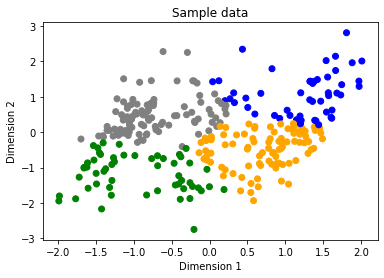

In [11]:
#Kmeans with k = 4
kmeans_4 = KMeans(n_clusters=4, random_state=0)
assignments_km4 = kmeans_4.fit_predict(sample[:,0:2])
plot_clusters(sample, assignments_km4)

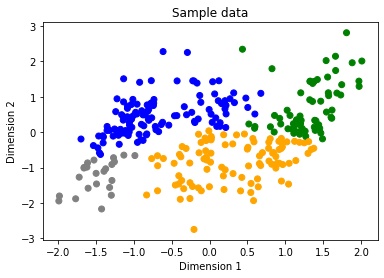

In [12]:
#Agglomerative with k = 4
agglomerative_4 = AgglomerativeClustering(n_clusters=4)
assignments_ag4 = agglomerative_4.fit_predict(sample[:,0:2])
plot_clusters(sample, assignments_ag4)

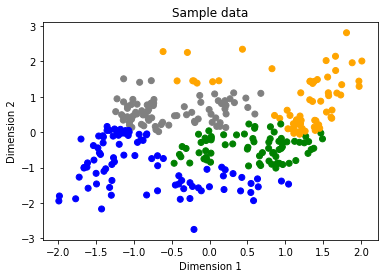

In [13]:
#Agglomerative with k = 4
agglomerative_4 = AgglomerativeClustering(n_clusters=4, linkage = 'complete')
assignments_ag4 = agglomerative_4.fit_predict(sample[:,0:2])
plot_clusters(sample, assignments_ag4)

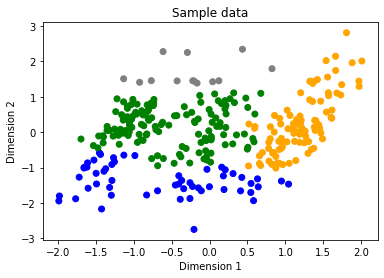

In [14]:
#Agglomerative with k = 4
agglomerative_4 = AgglomerativeClustering(n_clusters=4, linkage = 'average', affinity = 'manhattan')
assignments_ag4 = agglomerative_4.fit_predict(sample[:,0:2])
plot_clusters(sample, assignments_ag4)

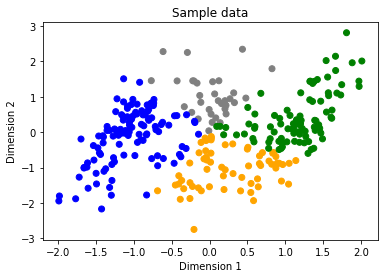

In [15]:
#Agglomerative with k = 4
agglomerative_4 = AgglomerativeClustering(n_clusters=4, linkage = 'average', affinity = 'cosine')
assignments_ag4 = agglomerative_4.fit_predict(sample[:,0:2])
plot_clusters(sample, assignments_ag4)

<a id='dbscan'></a>
## DBSCAN

**Density-based spatial clustering of applications with noise (DBSCAN)**

Is a well-known data clustering algorithm that is commonly used in data mining and machine learning.  

Based on a set of points (let’s think in a bidimensional space as exemplified in the figure), DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature

This algorithm defines clusters as continuous regions of high density. Here is how it works:
- For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance's ε-neighborhood.
- If an instance has at least *min_samples* instances in its ε-neighborhood (including itself), then it is considered a *core instance*. In other words, core instances are those that are located in dense regions.
- All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instance; therefore, a long sequence of neighboring core instances forms a single cluster.
- Any istance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

#### Parameters
The DBSCAN algorithm basically requires 2 parameters:
- **eps**: specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.
- **minPoints**: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.

#### Advantages
- Does not require one to specify the number of clusters in the data a priori, as opposed to k-means. 
- Can find arbitrarily shaped clusters. It can even find a cluster completely surrounded by (but not connected to) a different cluster. Due to the MinPts parameter, the so-called single-link effect (different clusters being connected by a thin line of points) is reduced.
- Has a notion of noise, and is robust to outliers.
- Requires just two parameters and is mostly insensitive to the ordering of the points in the database.

#### Disadvantages
- DBSCAN is not entirely deterministic: border points that are reachable from more than one cluster can be part of either cluster, depending on the order the data are processed. For most data sets and domains, this situation does not arise often and has little impact on the clustering result
- The quality of DBSCAN depends on the distance measure used in the function regionQuery(P,ε). The most common distance metric used is Euclidean distance. Especially for high-dimensional data, this metric can be rendered almost useless due to the so-called "Curse of dimensionality", making it difficult to find an appropriate value for ε. This effect, however, is also present in any other algorithm based on Euclidean distance.
- DBSCAN cannot cluster data sets well with large differences in densities
- If the data and scale are not well understood, choosing a meaningful distance threshold ε can be difficult.


In [16]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN()
dbscan.fit(sample)


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [17]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_

    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="b", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

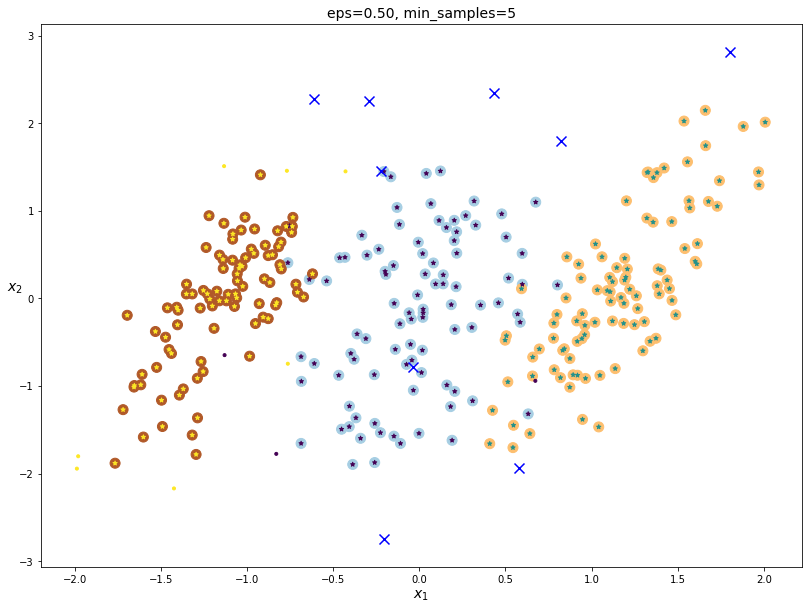

In [18]:
plt.figure(figsize=(30, 10))

plt.subplot(121)
plot_dbscan(dbscan, sample, size=100)

plt.show()

Cerchiamo di affinare la rappresentazione migliorando i parametri di DBSCAN

Esercizio: Cercare di trovare i valori migliori per eps e min_samples

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(sample)


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)

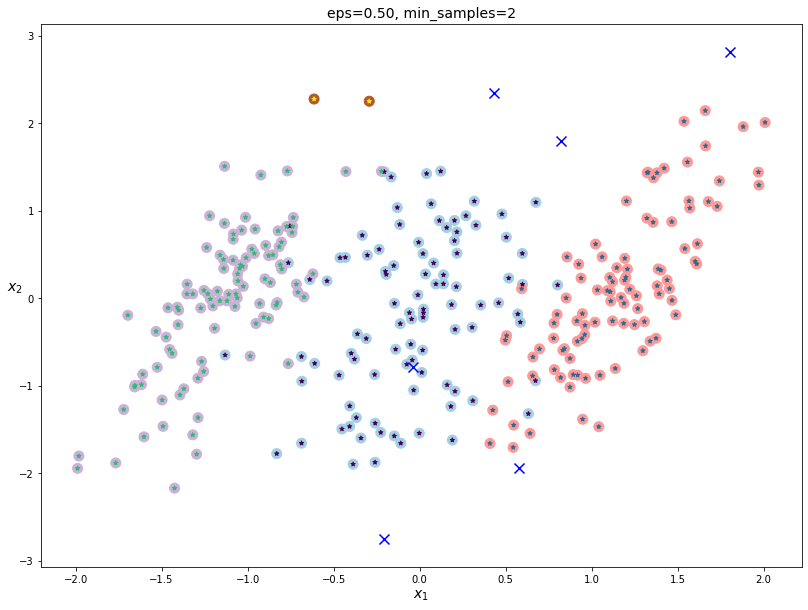

In [20]:
plt.figure(figsize=(30, 10))

plt.subplot(121)
plot_dbscan(dbscan, sample, size=100)

plt.show()

Surprisingly the DBSCAN class does not have a predict() method, although it has a *fit_predict()* method.  
In other words, it cannot predict which cluster a new instance belongs to.

This implementation decision was made because thifferent classification algorithms can be better for different tasks, so it's better to choose to use a classification model instead doing prediction with DBSCAN itself.

One of the easiest example is to use the KNeighborsClassifier!

In [21]:
#First we need to fit the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

In [22]:
#Then create new values
cov = np.array([[1.0,0.8],[0.8,1.0]])
mean = np.array([-2.5,0.0])
sample_new = make_dist(mean, cov, 3, 100, 4242)


Shape of sample = (100, 3)


In [23]:
#Make predictions
p_normal = knn.predict(sample_new)
p_prob = knn.predict_proba(sample_new)

In short DBSCAN is a very simple yet powerful algorithm capable of identifying any number of clusters of many shape. It is robust to outliers, and it has just two hyperparameters (eps and min_samples).  
If the density varies significantly across the clusters, however, it can be impossible for it to capture all the clusters properly.  

-----------------------

**Some useful links:**
- [Machine Master Video-Games](https://karpathy.github.io/2016/05/31/rl/); <br>
- [Machine Learning Project for Beginners](https://www.quora.com/What-are-some-really-interesting-machine-learning-projects-for-beginners); <br>
- [Journal of Machine Learning](http://www.jmlr.org/); <br>
- [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf)

With this paragraph ends the notebook "Modeling", the next notebook will be "Evaluating".
<br><br>
- [Click here to return to the top of the pag](#inizio)<a href='#inizio'></a>
<br><br>
If you have any doubts, you can write to us on Teams!<br>
See you soon!